In [10]:
import numpy as np
import matplotlib.pyplot as plt

import sim

In [11]:
t, L1, L2, ellt, N1, N2 = np.loadtxt('test_2.dat', unpack=True)

In [3]:
theta1, theta2 = 1.0471975511965976, 1.0471975511965976

In [4]:
def profile(i, L1, L2, ellt, h0=0.1, nb_points=101, disp = False) :
    xmin, xmax = -0.5*ellt[i] - 2*L1[i], 0.5*ellt[i] + 2*L2[i]
    xc1, xc2 = -0.5*ellt[i] - L1[i], 0.5*ellt[i] + L2[i]
    x = np.linspace(xmin, xmax, nb_points)
    profile_up = np.ones(len(x))*h0
    profile_down = -np.ones(len(x))*h0
    #return [xmin, xc1, xc2, xmax]
    for k in range(len(x)) :
        if x[k] >= xmin and x[k] < -0.5*ellt[i] :
            profile_up[k] = h_L1_up(x[k], h0, L1[i], theta1, ellt[i])
            profile_down[k] = h_L1_down(x[k], h0, L1[i], theta1, ellt[i])
            if disp :
                print x[k], 'Lumen 1'
        elif x[k] > 0.5*ellt[i] and x[k] <= xmax :
            profile_up[k] = h_L2_up(x[k], h0, L2[i], theta2, ellt[i])
            profile_down[k] = h_L2_down(x[k], h0, L2[i], theta2, ellt[i])
            if disp :
                print x[k], 'Lumen 2'
        else :
            if disp :
                print x[k], 'Cleft'
    return profile_up, profile_down

def h_L1_up(x, h0, L1t, theta1, ellt) :
    R1 = L1t / np.sin(theta1)
    return h0 - np.sqrt(R1**2 - L1t**2) + np.sqrt(R1**2 - (x + L1t + ellt/2)**2)

def h_L1_down(x, h0, L1t, theta1, ellt) :
    R1 = L1t / np.sin(theta1)
    return - h0 + np.sqrt(R1**2 - L1t**2) - np.sqrt(R1**2 - (x + L1t + ellt/2)**2)

def h_L2_up(x, h0, L2t, theta2, ellt) :
    R2 = L2t / np.sin(theta2)
    return h0 - np.sqrt(R2**2 - L2t**2) + np.sqrt(R2**2 - (x - L2t - ellt/2)**2)

def h_L2_down(x, h0, L2t, theta2, ellt) :
    R2 = L2t / np.sin(theta2)
    return - h0 + np.sqrt(R2**2 - L2t**2) - np.sqrt(R2**2 - (x - L2t - ellt/2)**2)

In [5]:
def pressure(i, x, h, delta=1e-3) :
    dxi = x[i]-x[i-1]
    ddh_dxx = (h[i+1]-2.*h[i] + h[i-1])/(dxi**2)
    Up = (1./delta) * (delta/h[i])**3 * (1. - delta/h[i])
    return -ddh_dxx + Up


0.9999999999999999


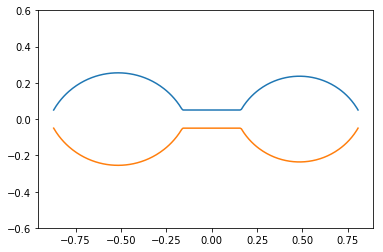

1.0


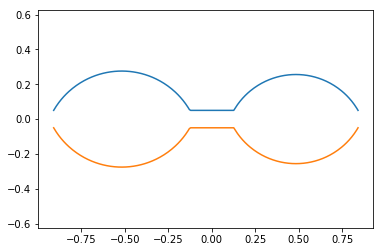

1.0


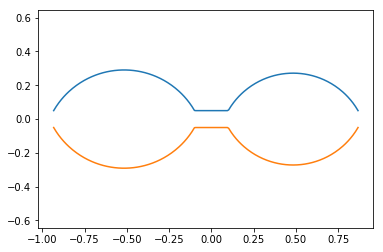

1.0


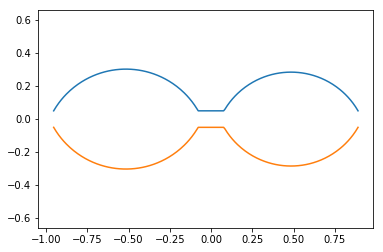

1.00001


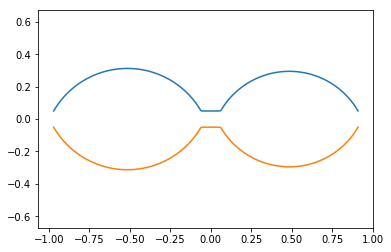

1.0


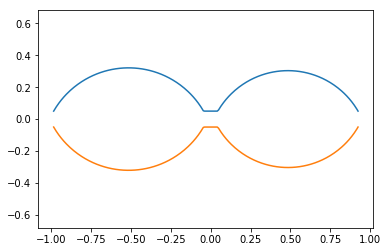

1.00001


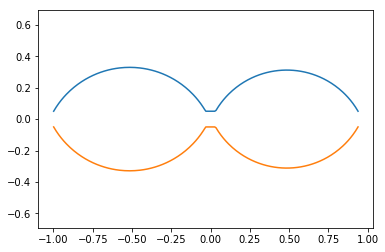

1.00001


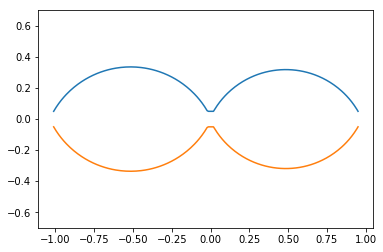

1.0


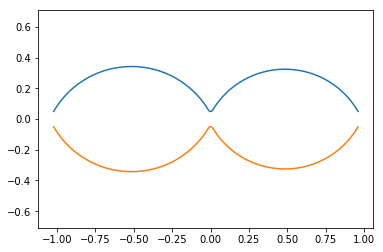

1.0


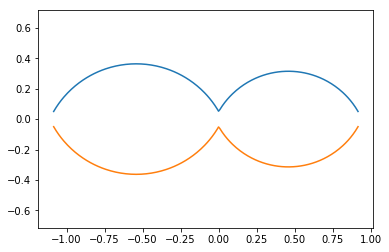

1.0


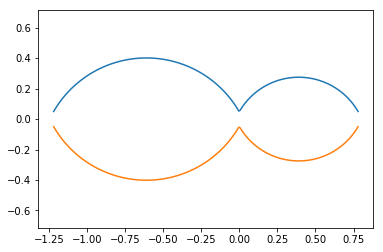

1.0


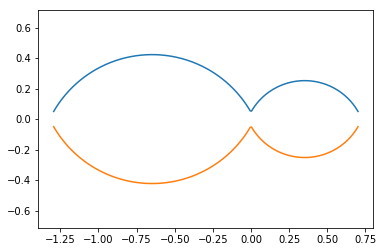

1.00001


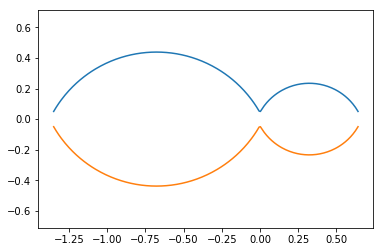

1.0


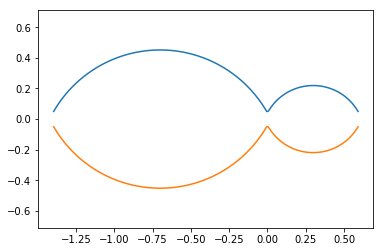

1.0


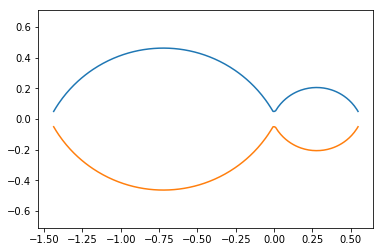

1.00001


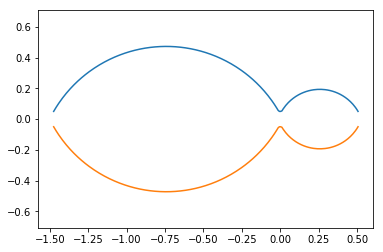

1.0


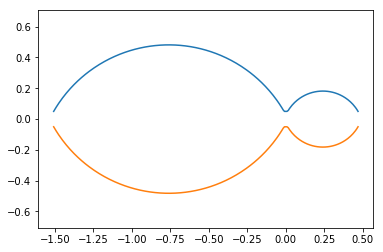

1.0


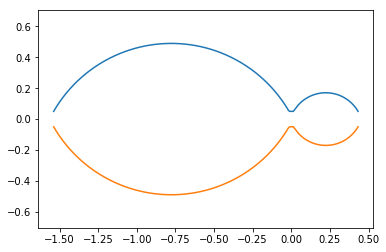

1.0


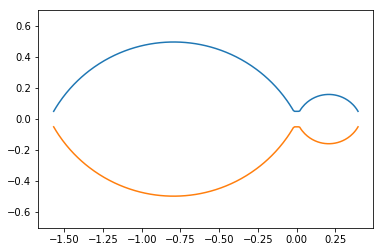

0.99999


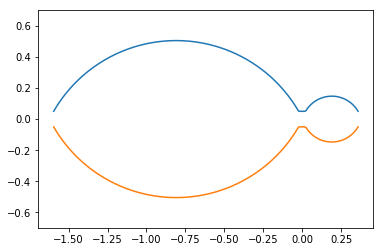

1.0


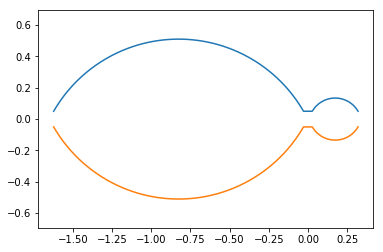

0.9999899999999999


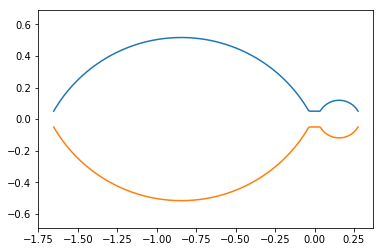

0.9999999999999999


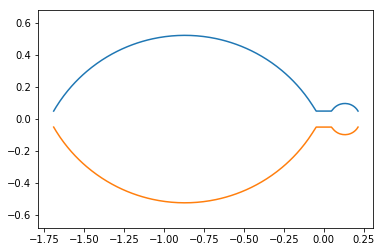

1.0


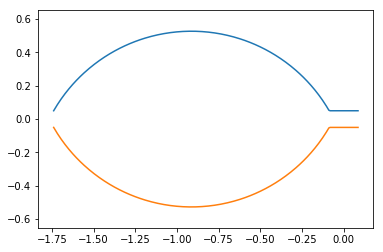

0.9999899999999999


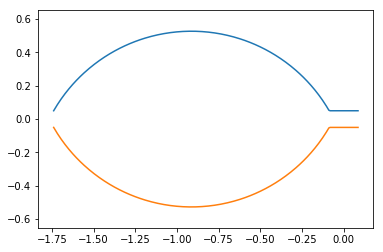

In [6]:
N = 241
n = 10
h0 = 0.05
for i in range(len(t)/n+1) :
    print L1[i]+L2[i]+ellt[i]
    h_up, h_down = profile(i*n, L1, L2, ellt, nb_points=N, h0=h0)
    xmin, xmax = -0.5*ellt[i*n] - 2*L1[i*n], 0.5*ellt[i*n] + 2*L2[i*n]
    x = np.linspace(xmin, xmax, len(h_up))
    p = np.array([pressure(k, x, h_up) for k in range(1, len(x)-1)])
    plt.axis('equal')
    plt.plot(x, h_up)
    plt.plot(x, h_down)
    plt.show()
    #plt.plot(x[1:-1], p)
    
    

In [10]:
-L1[0]-0.5*ellt[0], L2[0]+0.5*ellt[0]

(-0.51613, 0.48386999999999997)

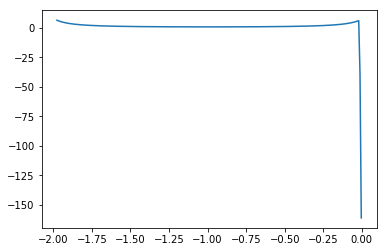

In [11]:
plt.plot(x[1:-1], p)

In [169]:
def f1(x, xc, k, w, h0) :
    if np.abs(x-xc) <= w :
        return k*(w**2 - (x-xc)**2) +h0
    else :
        return h0

def f2(x, xc, k, w, h0) :
    if np.abs(x-xc) <= np.sqrt(2*np.pi)*w :
        return (np.exp(- (x-xc)**2 / (2*w**2))) / (np.sqrt(2*np.pi)*w) + h0
    else :
        return h0

def F1(x, h0, k1, k2, xc1, xc2, w1, w2) :
    return f1(x, xc1, k1, w1, h0)+f1(x, xc2, k2, w2, h0) - h0

def F1_convolve(x, h0, k1, k2, xc1, xc2, w1, w2) :
    return np.convolve(f1(x, xc1, k1, w1, h0), f1(x, xc2, k2, w2, h0)) - h0

def F2(x, h0, k1, k2, xc1, xc2, w1, w2) :
    return f2(x, xc1, k1, w1, h0)+f2(x, xc2, k2, w2, h0) - h0

def F2_convolve(x, h0, k1, k2, xc1, xc2, w1, w2) :
    return np.convolve(f2(x, xc1, k1, w1, h0), f2(x, xc2, k2, w2, h0)) - h0

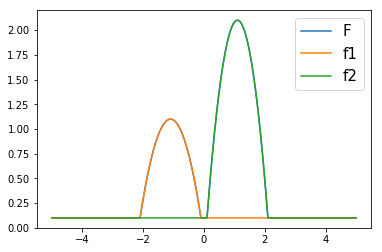

In [175]:
x = np.linspace(-5., 5., 1001)
h0=0.1
xc1, xc2 = -1.1, 1.1
k1, k2 = 1, 2
w1, w2 = 1., 1.

F_x1 = np.array([F1(x[i], h0=h0, k1=k1, k2=k2, xc1=xc1, xc2=xc2, w1=w1, w2=w2) for i in range(len(x))])
F_x1_c = np.array([F1_convolve(x[i], h0=h0, k1=k1, k2=k2, xc1=xc1, xc2=xc2, w1=w1, w2=w2) for i in range(len(x))])

fl_x1 = np.array([f1(x[i], xc=xc1, k=k1, w=w1, h0=h0) for i in range(len(x))])
fr_x1 = np.array([f1(x[i], xc=xc2, k=k2, w=w2, h0=h0) for i in range(len(x))])

plt.plot(x, F_x1, label = 'F')
#plt.plot(x, F_x1_c, label = 'F_c')
plt.plot(x, fl_x1, label = 'f1')
plt.plot(x, fr_x1, label = 'f2')
plt.legend(fontsize=15)

In [9]:
np.cosh(1/140.)/np.sinh(1/140.186)

140.1883872687469